In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv("../data/gapminder_total.csv")

In [140]:
df.head()

,continent,country,year,life expectancy,fertility,population
0,Africa,Algeria,1950,42.77,7.65,8872247.0
1,Africa,Algeria,1951,43.03,7.65,9039913.0
2,Africa,Algeria,1952,43.50,7.65,9216395.0
3,Africa,Algeria,1953,43.96,7.65,9405445.0
4,Africa,Algeria,1954,44.44,7.65,9609507.0


In [5]:
# 2
df["population"].median()

5190648.5

In [6]:
# 3
df["continent"].value_counts()

Africa                   3234
Europe                   2640
Asia                     2574
North America            1254
South America             792
Australia and Oceania     594
Name: continent, dtype: int64

In [7]:
# 3
df["fertility"].min()

1.13

In [8]:
df_f = df[df["fertility"] ==df["fertility"].min()]
df_f

,continent,country,year,life expectancy,fertility,population
6518,Europe,Czech Republic,2000,75.0,1.13,10263010.0


In [9]:
df.groupby("continent")["fertility"].mean()

continent
Africa                   5.931345
Asia                     4.673862
Australia and Oceania    4.682172
Europe                   2.169754
North America            4.002329
South America            4.077235
Name: fertility, dtype: float64

In [10]:
# 5
e_2015 = df[(df["continent"] == "Europe") & (df["year"] == 2015)]["life expectancy"].mean()

In [11]:
e_2015

78.75499999999998

In [12]:
df_2015 = df[df["year"]== 2015]

In [24]:
df_2015.groupby("continent")["life expectancy"].mean()

continent
Africa                   63.410204
Asia                     73.933333
Australia and Oceania    69.666667
Europe                   78.755000
North America            75.152632
South America            75.141667
Name: life expectancy, dtype: float64

In [16]:
# 6
df.groupby("continent")["country"].count()

continent
Africa                   3234
Asia                     2574
Australia and Oceania     594
Europe                   2640
North America            1254
South America             792
Name: country, dtype: int64

In [55]:
df_y = df[df["year"]== 1995]

In [56]:
df_y.groupby("continent")["country"].count()

continent
Africa                   49
Asia                     39
Australia and Oceania     9
Europe                   40
North America            19
South America            12
Name: country, dtype: int64

In [19]:
# 7
df_1976 = df[df["year"]== 1976]

In [40]:
df_1 = df_1976.groupby("continent")["population"].mean().round()

In [70]:
# df_1.astype(int) 
df_1

continent
Africa                    7850933.0
Asia                     60323406.0
Australia and Oceania     2360114.0
Europe                   13840494.0
North America            18505322.0
South America            18496211.0
Name: population, dtype: float64

In [47]:
df_2 = df_2015.groupby("continent")["population"].mean().round()

In [48]:
df_2

continent
Africa                    21417684.0
Asia                     109528467.0
Australia and Oceania      4252114.0
Europe                    15122676.0
North America             29900366.0
South America             34847974.0
Name: population, dtype: float64

In [79]:
# 8
df_3= df.groupby(["continent"])["population"].max().round()

In [80]:
df_3.astype(int)

continent
Africa                    182201962
Asia                     1376048943
Australia and Oceania      23968973
Europe                     82010184
North America             321773631
South America             207847528
Name: population, dtype: int32

In [126]:
# 9
pop_max = df.groupby(["continent", "year"])["population"].sum().max()

In [127]:

df.groupby(['continent','year'])['population'].sum()[df.groupby(['continent','year'])['population'].sum()==pop_max]

continent  year
Asia       2015    4.271610e+09
Name: population, dtype: float64

In [139]:

df_u = df.groupby(["continent", "year"]).agg({"population": "sum"})
df_u

population
continent     year             
Africa        1950  206130829.0
              1951  210281902.0
              1952  214650546.0
              1953  219228593.0
              1954  224010333.0
...                         ...
South America 2011  401182686.0
              2012  405500384.0
              2013  409786747.0
              2014  414017917.0
              2015  418175687.0

[396 rows x 1 columns]

In [137]:
df_u[df_u['population'] == df_u['population'].max()]

,,population
continent,year,
Asia,2015,4.271610e+09


<AxesSubplot:xlabel='continent'>

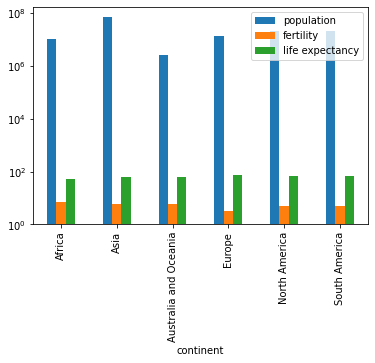

In [145]:
# 10 Plot a bar plot comparison of life_expectancy, fertility, population average per continent
# Hint: for a quick and dirty graph use Pandas ploting ability
# Hint: use log=True to make the visual more friendly to the eyes

df.groupby(["continent"]).agg({"population":"mean", "fertility":"mean", "life expectancy":"mean"}).plot(kind="bar", log = True)
